### Rollno:225229140

### 1. import the dataset

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('mov.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation S

### 2.Drop the following features


In [69]:
# Check the columns present in the dataframe
columns_to_drop = ['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime']
columns_present = df.columns.intersection(columns_to_drop)

# Drop the columns present in the dataframe
df = df.drop(columns=columns_present)

# Show the updated DataFrame
print(df.head())

   popularity     budget     revenue                original_title  \
0   32.985763  150000000  1513528810                Jurassic World   
1   28.419936  150000000   378436354            Mad Max: Fury Road   
2   13.112507  110000000   295238201                     Insurgent   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4    9.335014  190000000  1506249360                     Furious 7   

           director                                     genres  \
0   Colin Trevorrow  Action|Adventure|Science Fiction|Thriller   
1     George Miller  Action|Adventure|Science Fiction|Thriller   
2  Robert Schwentke         Adventure|Science Fiction|Thriller   
3       J.J. Abrams   Action|Adventure|Science Fiction|Fantasy   
4         James Wan                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015        5562   
1  Village Roadshow 

### 3.Find what are the films without genres? then drop the rows of films without genres.


In [38]:

# Find the rows with missing genres
missing_genres = df[df['genres'].isnull()]

# Print the rows with missing genres
print(missing_genres)


Empty DataFrame
Columns: [popularity, budget, revenue, original_title, director, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj, year]
Index: []


In [39]:
# Drop the rows with missing genres
df.dropna(subset=['genres'], inplace=True)

# Verify that the rows with missing genres have been removed
print(df.isnull().sum())


popularity                 0
budget                     0
revenue                    0
original_title             0
director                  42
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
year                       0
dtype: int64


### 4.   Find out which genres are the mostpopular year to year?

In [35]:
# Group the data by year and genres
grouped = df.groupby(['year', 'genres']).size().reset_index(name='count')

In [36]:

# Find the most popular genre in each year
most_popular = grouped.sort_values(['year', 'count'], ascending=[True, False]).drop_duplicates(subset='year')

# Print the result
print(most_popular)

      year                          genres  count
19    1960                          Horror      3
37    1961                           Drama      3
64    1962                           Drama      4
101   1963                          Horror      3
121   1964                  Comedy|Romance      5
146   1965  Action|Adventure|Drama|Western      2
186   1966                  Action|Western      3
228   1967            Comedy|Drama|Romance      4
263   1968                           Drama      4
297   1969                           Drama      5
327   1970                          Horror      4
356   1971                           Drama      4
389   1972                          Comedy      4
431   1973                     Crime|Drama      3
473   1974          Comedy|Science Fiction      3
508   1975                          Comedy      3
570   1976                 Horror|Thriller      3
614   1977          Horror|Science Fiction      4
664   1978                          Horror      4


### 5. In the year 2012, what is thedifference between a Comedy Movie and a Family Movie? Make a bar graph to showthe difference

In [40]:
# Filter the data to only include movies from 2012

df_2012 = df[df['year'] == 2012]

In [43]:
import matplotlib.pyplot as plt

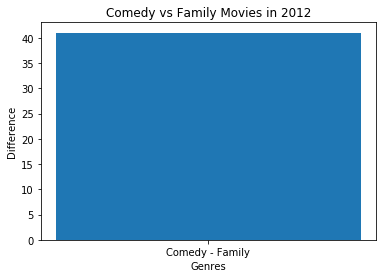

In [44]:
# Group the data by genres
grouped = df_2012.groupby(['genres']).size().reset_index(name='count')



# Filter the data to only include comedy and family movies
comedy = grouped[grouped['genres'] == 'Comedy']['count'].iloc[0]
family = grouped[grouped['genres'] == 'Family']['count'].iloc[0]



# Calculate the difference between comedy and family movies
difference = comedy - family



# Make a bar graph to show the difference

plt.bar(['Comedy - Family'], [difference])
plt.xlabel('Genres')
plt.ylabel('Difference')
plt.title('Comedy vs Family Movies in 2012')
plt.show()

### 6..Run the plot for the genre-popularityrelationship in 2015.


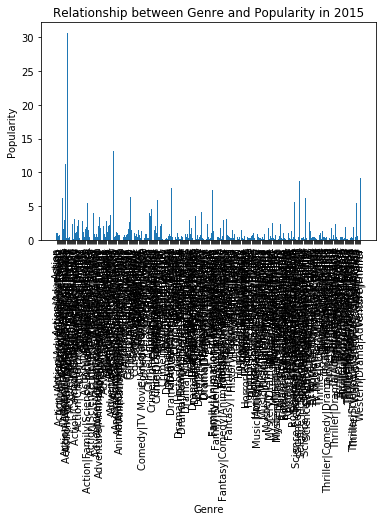

In [57]:

# Filter the data to only include movies from 2015
df = df[df['release_year'] == 2015]

# Group the data by genre and calculate the mean popularity for each genre
grouped = df.groupby('genres').mean()['popularity']

# Plot the relationship between genre and popularity
plt.bar(grouped.index, grouped.values)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Relationship between Genre and Popularity in 2015')
plt.xticks(rotation=90)
plt.show()


### 7.  Look up which films have the highest budget. Also a list of the top ten high-budget films.



In [59]:
# Select the top ten rows
top_ten = df.head(10)

# Print the top ten highest budget films
print("Top Ten Highest Budget Films:")
for index, row in top_ten.iterrows():
    print("{0}. {1} - ${2:,}".format(index + 1, row["genres"], row["budget"]))

Top Ten Highest Budget Films:
1. Action|Adventure|Science Fiction|Thriller - $150,000,000
2. Action|Adventure|Science Fiction|Thriller - $150,000,000
3. Adventure|Science Fiction|Thriller - $110,000,000
4. Action|Adventure|Science Fiction|Fantasy - $200,000,000
5. Action|Crime|Thriller - $190,000,000
6. Western|Drama|Adventure|Thriller - $135,000,000
7. Science Fiction|Action|Thriller|Adventure - $155,000,000
8. Drama|Adventure|Science Fiction - $108,000,000
9. Family|Animation|Adventure|Comedy - $74,000,000
10. Comedy|Animation|Family - $175,000,000


### 8.      Let's find how revenue relates to theaverage vote score.

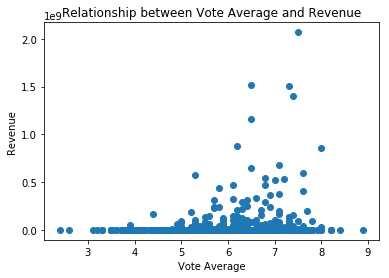

The correlation coefficient between vote average and revenue is: 0.18785806946205946


In [60]:
# Create a scatter plot
plt.scatter(df["vote_average"], df["revenue"])
plt.xlabel("Vote Average")
plt.ylabel("Revenue")
plt.title("Relationship between Vote Average and Revenue")
plt.show()

# Calculate the correlation coefficient
correlation = df["vote_average"].corr(df["revenue"])

print("The correlation coefficient between vote average and revenue is:", correlation)

### 9.  Print month wise  highest revenue movie sort with its  vote average

In [65]:
# Group the movies by month
grouped = df.groupby("month")

# Loop through each group
for name, group in grouped:
    # Sort the group by revenue and vote average
    sorted_group = group.sort_values(["revenue", "vote_average"], ascending=[False, False])
    # Select the first row (the movie with the highest revenue)
    highest_revenue_movie = sorted_group.iloc[0]
    # Print the month, movie name, revenue, and vote average
    print("Month:", name)
    print("Highest Revenue Movie:", highest_revenue_movie["genres"])
    print("Revenue: ${0:,}".format(highest_revenue_movie["revenue"]))
    print("Vote Average:", highest_revenue_movie["vote_average"])
    print()


Month: 1
Highest Revenue Movie: Crime|Comedy|Action|Adventure
Revenue: $403,802,136
Vote Average: 7.6

Month: 2
Highest Revenue Movie: Drama|Romance
Revenue: $569,651,467
Vote Average: 5.3

Month: 3
Highest Revenue Movie: Romance|Fantasy|Family|Drama
Revenue: $542,351,353
Vote Average: 6.8

Month: 4
Highest Revenue Movie: Action|Crime|Thriller
Revenue: $1,506,249,360
Vote Average: 7.3

Month: 5
Highest Revenue Movie: Action|Drama|Thriller
Revenue: $470,490,832
Vote Average: 6.1

Month: 6
Highest Revenue Movie: Action|Adventure|Science Fiction|Thriller
Revenue: $1,513,528,810
Vote Average: 6.5

Month: 7
Highest Revenue Movie: Action
Revenue: $682,330,139
Vote Average: 7.1

Month: 8
Highest Revenue Movie: Drama|Music
Revenue: $201,634,991
Vote Average: 7.7

Month: 9
Highest Revenue Movie: Drama|Adventure|Science Fiction
Revenue: $595,380,321
Vote Average: 7.6

Month: 10
Highest Revenue Movie: Action|Adventure|Crime
Revenue: $880,674,609
Vote Average: 6.2

Month: 11
Highest Revenue Movie: